In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')

In [17]:
df.shape

(220632, 24)

In [18]:
df.sample(5)

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
194226,194226,India,1380,39,Male,Yes,16,27,No,No,...,Medium,No,No,Poor,No,NaN,Developing,70000,2.21,0.0
105685,105685,Myanmar,54,69,Male,Yes,36,7,No,No,...,Low,No,No,Poor,Yes,NaN,Developing,34021,2.23,0.0
58833,58833,USA,331,42,Male,Yes,36,15,No,No,...,High,No,No,Good,Yes,NaN,Developed,130000,1.61,0.0
19460,19460,China,1400,64,Male,No,0,0,No,No,...,Medium,No,Yes,Poor,No,NaN,Developing,690000,1.62,0.0
15965,15965,Nigeria,206,71,Female,No,0,0,No,No,...,Low,Yes,Yes,Poor,Yes,NaN,Developing,20000,1.68,0.0


In [19]:
df[['Lung_Cancer_Diagnosis', 'Cancer_Stage', 'Survival_Years', 'Adenocarcinoma_Type']].sample(5)

,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type
118155,No,NaN,0,Yes
119460,No,NaN,0,Yes
132158,No,NaN,0,No
30956,No,NaN,0,Yes
100106,No,NaN,0,Yes


In [20]:
df['Mortality_Rate'].value_counts()

Mortality_Rate
0.00     211671
70.38        10
84.23        10
75.04        10
82.11        10
          ...  
82.29         1
88.97         1
71.55         1
70.68         1
74.28         1
Name: count, Length: 2849, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [22]:
mis_val = df.isna().sum()
mis_val_per = 100* mis_val/len(df)
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1).rename({0:'Missing values', 1:'% of total'})
mis_val_table

,0,1
ID,0,0.000000
Country,0,0.000000
Population_Size,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Smoker,0,0.000000
Years_of_Smoking,0,0.000000
Cigarettes_per_Day,0,0.000000
Passive_Smoker,0,0.000000
Family_History,0,0.000000


In [23]:
df.describe()

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
numeric_cols = df.select_dtypes(np.number).columns.tolist()
categorical_cols = df.select_dtypes(object).columns.tolist()
numeric_cols, categorical_cols

(['ID',
  'Population_Size',
  'Age',
  'Years_of_Smoking',
  'Cigarettes_per_Day',
  'Survival_Years',
  'Annual_Lung_Cancer_Deaths',
  'Lung_Cancer_Prevalence_Rate',
  'Mortality_Rate'],
 ['Country',
  'Gender',
  'Smoker',
  'Passive_Smoker',
  'Family_History',
  'Lung_Cancer_Diagnosis',
  'Cancer_Stage',
  'Adenocarcinoma_Type',
  'Air_Pollution_Exposure',
  'Occupational_Exposure',
  'Indoor_Pollution',
  'Healthcare_Access',
  'Early_Detection',
  'Treatment_Type',
  'Developed_or_Developing'])

In [26]:
len(numeric_cols)

9

Country having highest mortality

C:\Users\Abid\AppData\Local\Temp\ipykernel_13776\2287533731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='Mortality_Rate', y='Country', palette='viridis')


<Axes: xlabel='Mortality_Rate', ylabel='Country'>

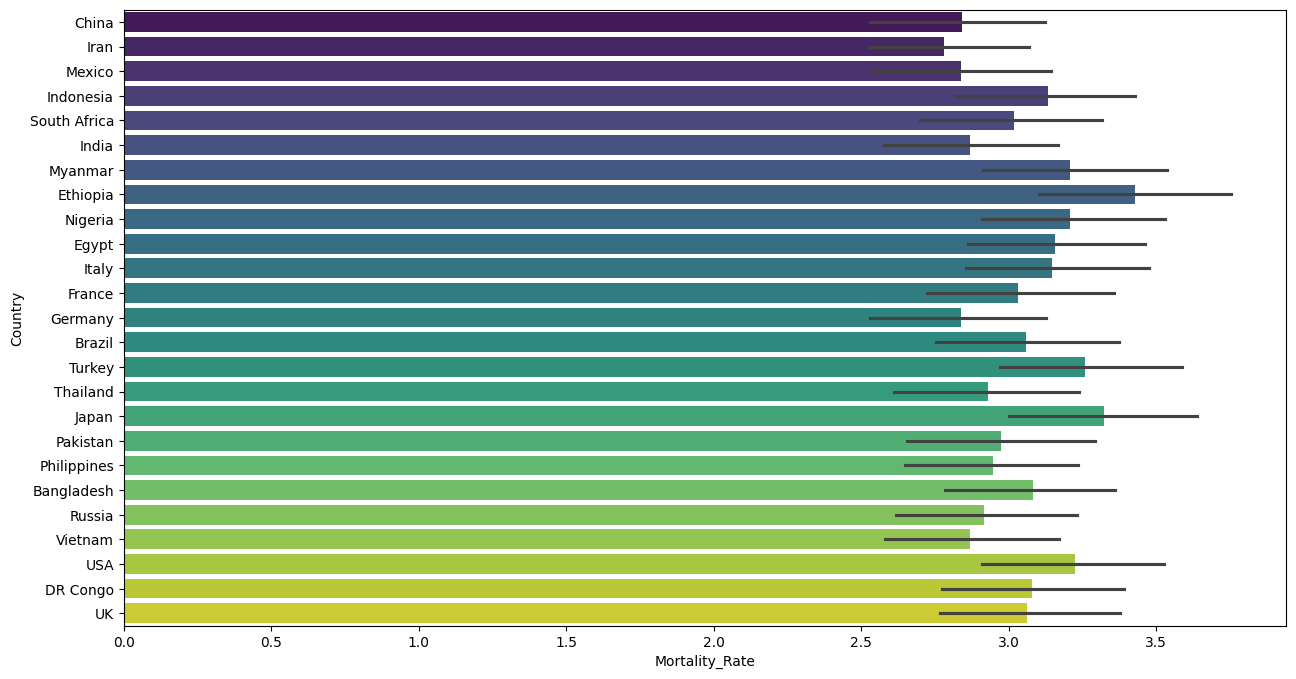

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(df, x='Mortality_Rate', y='Country', palette='viridis')

In [28]:
top3_countries_highest_morality = df.sort_values(by='Mortality_Rate', ascending=False)[['Country','Mortality_Rate']].head(3)
top3_countries_highest_morality.style.background_gradient(cmap='Pastel1')

,Country,Mortality_Rate
101782,Iran,90.000000
39429,South Africa,90.000000
106230,Italy,89.990000


Country having most annual deaths

C:\Users\Abid\AppData\Local\Temp\ipykernel_13776\122266685.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,x='Annual_Lung_Cancer_Deaths', y='Country', palette='viridis')


<Axes: xlabel='Annual_Lung_Cancer_Deaths', ylabel='Country'>

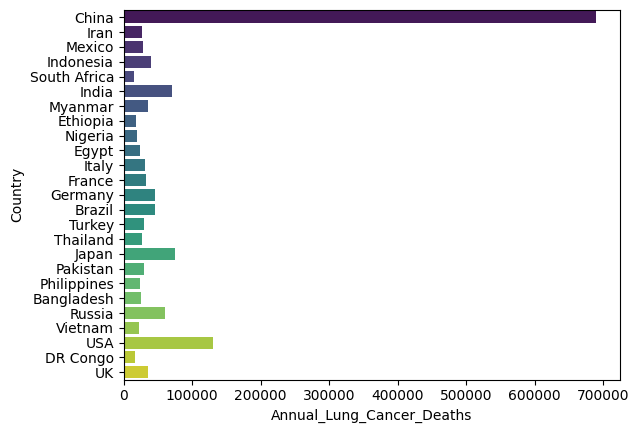

In [29]:
sns.barplot(df,x='Annual_Lung_Cancer_Deaths', y='Country', palette='viridis')

top5_countries_most_annual_deaths = df.sort

In [30]:
top5_countries_most_annual_deaths = df.sort_values(by='Annual_Lung_Cancer_Deaths', ascending=False)[['Country',  'Annual_Lung_Cancer_Deaths']]
z = top5_countries_most_annual_deaths.groupby('Annual_Lung_Cancer_Deaths')['Country'].idxmax()
# top5_countries_most_annual_deaths.style.background_gradient(cmap='Pastel1')

Top 5 Countries with most deaths

In [31]:
top5_countries_most_deaths = df.groupby('Country')['Annual_Lung_Cancer_Deaths'].sum()
top5_countries_most_deaths = top5_countries_most_deaths.to_frame()
top5_countries_most_deaths = top5_countries_most_deaths.sort_values(by='Annual_Lung_Cancer_Deaths',ascending=False).head(5)
top5_countries_most_deaths.style.background_gradient(cmap='Pastel1')

,Annual_Lung_Cancer_Deaths
Country,
China,6145830000
USA,1139970000
Japan,674175000
India,612640000
Russia,528240000


C:\Users\Abid\AppData\Local\Temp\ipykernel_13776\348567813.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top5_countries_most_deaths, y='Annual_Lung_Cancer_Deaths', x=top5_countries_most_deaths.index, palette='viridis')


<Axes: xlabel='Country', ylabel='Annual_Lung_Cancer_Deaths'>

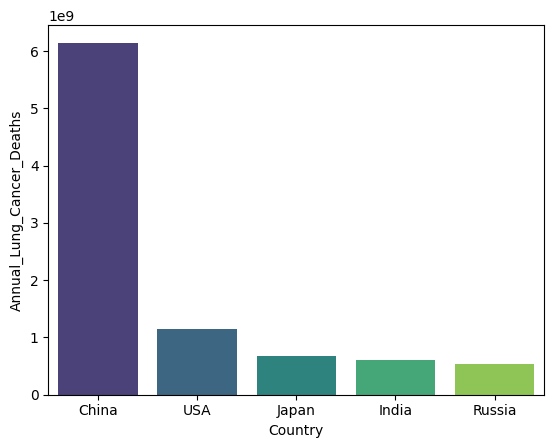

In [32]:
sns.barplot(top5_countries_most_deaths, y='Annual_Lung_Cancer_Deaths', x=top5_countries_most_deaths.index, palette='viridis')

Which Gender has more smokers

In [44]:
gender_having_most_smokers = df.groupby('Gender')['Smoker'].value_counts().reset_index()
gender_having_most_smokers.style.background_gradient(cmap='Pastel1')

,Gender,Smoker,count
0,Female,No,82834
1,Female,Yes,27654
2,Male,Yes,60687
3,Male,No,49457


C:\Users\Abid\AppData\Local\Temp\ipykernel_13776\2749574707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(gender_having_most_smokers, x='Gender', y='count', palette='viridis')


<Axes: xlabel='Gender', ylabel='count'>

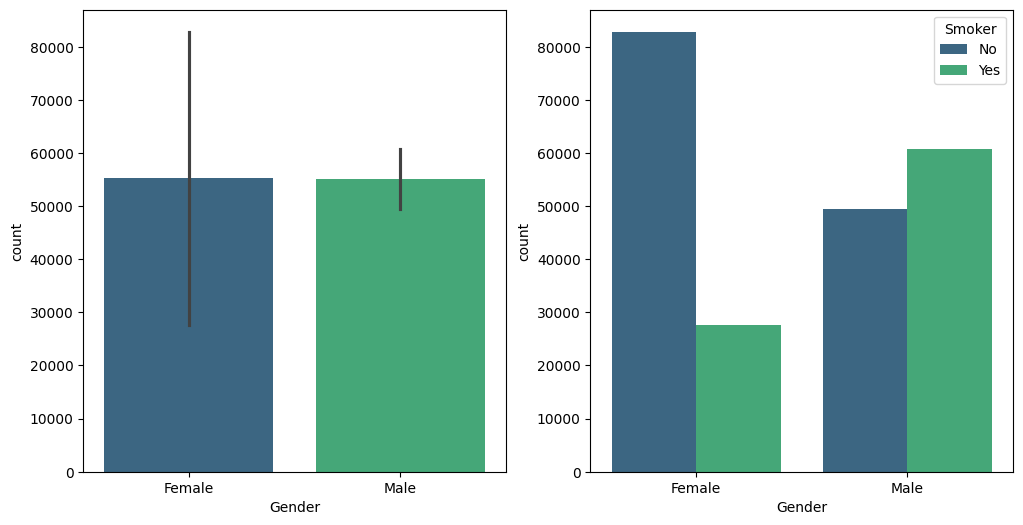

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(gender_having_most_smokers, x='Gender', y='count', palette='viridis')
plt.subplot(1,2,2)
sns.barplot(gender_having_most_smokers, x='Gender', y='count', hue='Smoker', palette='viridis')

Rate of Early Detection as compared to Healthcare standards

In [45]:
early_detection_vs_healthcare =  df.groupby('Healthcare_Access')['Early_Detection'].value_counts().reset_index()
early_detection_vs_healthcare.style.background_gradient(cmap='Pastel1')

,Healthcare_Access,Early_Detection,count
0,Good,Yes,26474
1,Good,No,17615
2,Poor,No,141298
3,Poor,Yes,35245


C:\Users\Abid\AppData\Local\Temp\ipykernel_13776\1864091820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(early_detection_vs_healthcare, x='Healthcare_Access', y='count', palette='viridis')


<Axes: xlabel='Healthcare_Access', ylabel='count'>

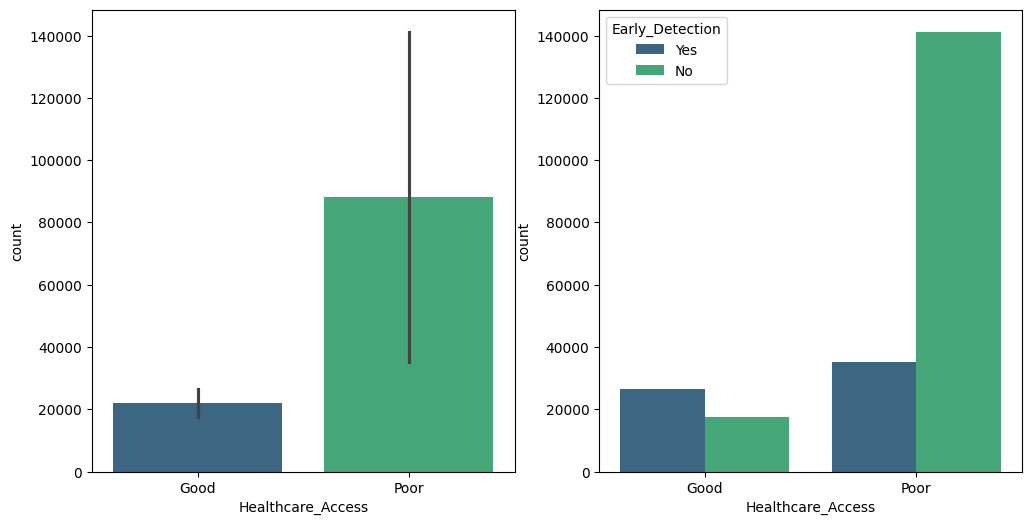

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(early_detection_vs_healthcare, x='Healthcare_Access', y='count', palette='viridis')
plt.subplot(1,2,2)
sns.barplot(early_detection_vs_healthcare, x='Healthcare_Access', y='count', hue='Early_Detection', palette='viridis')